# Imports + Setup

In [1]:
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

plt.rcParams.update({'figure.figsize':(11,7), 'figure.dpi':120})
image_dest = 'results_images/'
visual_specs={'fontsize':14, 'palette':'Greys', 'saturation':0.5}
fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
folder = '../../002_Data/Release_4/'

id_col = 'SPA_PER_ID'
event_col = 'CMIS_MATCH'

# Load Data

In [2]:
filename = 'log_predictions0.pickle'
infile = open(folder+filename,'rb')
log_predictions = pickle.load(infile)
infile.close()
log_predictions = log_predictions.groupby([id_col, event_col]).prediction.max().reset_index()
print(len(log_predictions))
log_predictions.head()

85494


,SPA_PER_ID,CMIS_MATCH,prediction
0,1,False,0.002934
1,3,False,0.006042
2,4,False,0.003147
3,6,False,0.005918
4,12,False,0.004876


## Check residuals are normally distributed

In [3]:
import statsmodels.api as sm

<AxesSubplot:xlabel='prediction', ylabel='Density'>

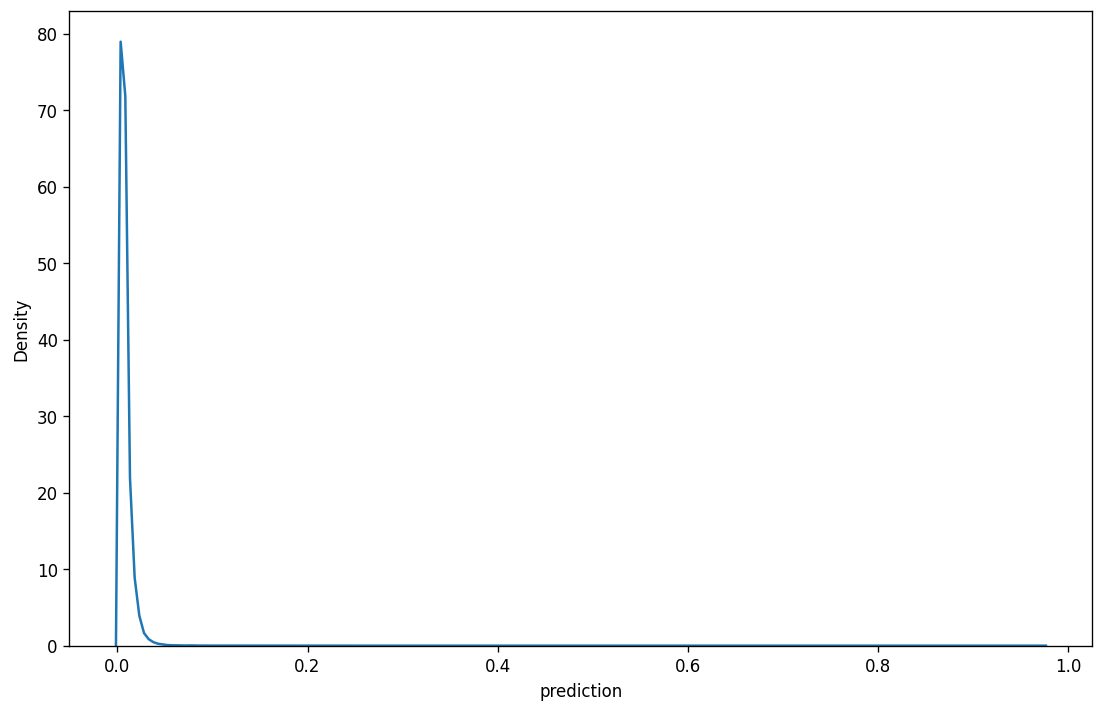

In [4]:
sns.kdeplot(log_predictions['prediction'])

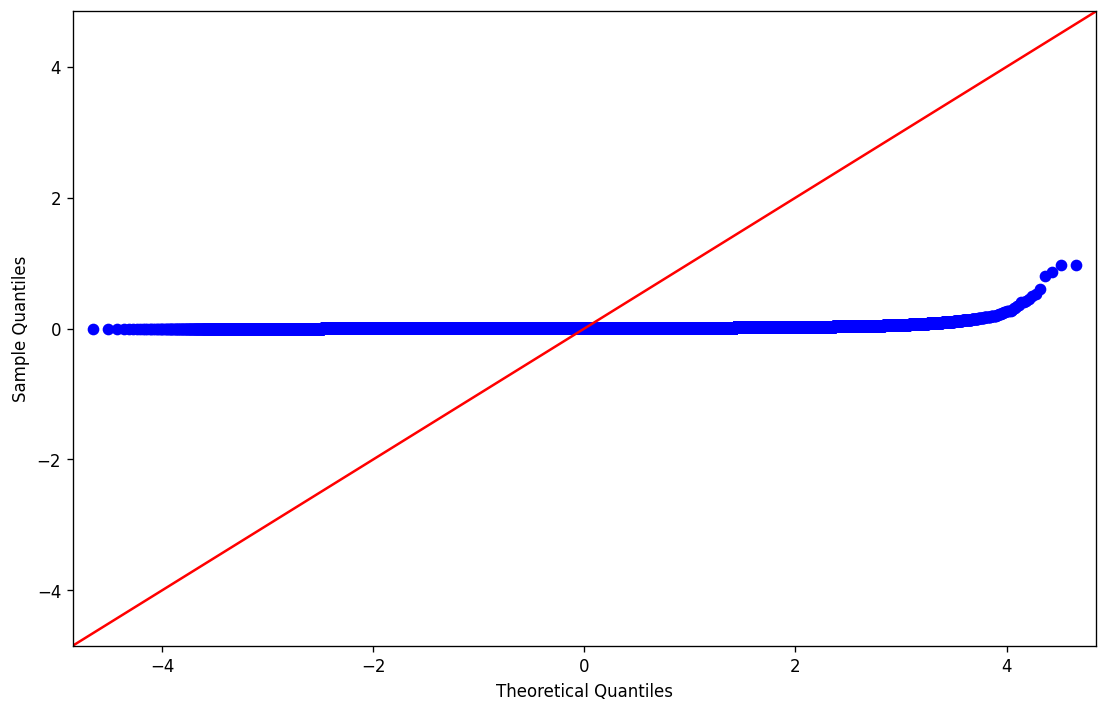

In [5]:
fig = sm.qqplot(log_predictions['prediction'], line='45')
plt.show()

In [3]:
filename = 'coxPH_predictions0.pickle'
infile = open(folder+filename,'rb')
coxPH_predictions = pickle.load(infile)
infile.close()
coxPH_predictions = coxPH_predictions.groupby([id_col, event_col]).prediction.max().reset_index()
print(len(coxPH_predictions))
coxPH_predictions.head()

85494


,SPA_PER_ID,CMIS_MATCH,prediction
0,1,False,0.378964
1,3,False,0.697509
2,4,False,0.478961
3,6,False,0.739312
4,12,False,0.472950


In [4]:
filename = 'coxTVC_predictions.pickle'
infile = open(folder+filename,'rb')
coxTVC_predictions = pickle.load(infile)
infile.close()
print(len(coxTVC_predictions))
coxTVC_predictions.head()

85494


,SPA_PER_ID,CMIS_MATCH,prediction
0,1,False,0.311107
1,3,False,0.436468
2,4,False,0.320706
3,6,False,0.448386
4,12,False,0.256016


## Save CSV

In [13]:
coxTVC_predictions = coxTVC_predictions.sort_values(by='prediction', ascending=False).rename({'CMIS_MATCH':'actual_outcome', 'prediction':'predicted_risk'}, axis=1)
coxTVC_predictions.head()

,SPA_PER_ID,actual_outcome,predicted_risk
2521,8838,False,91658.247000
66682,238013,False,19892.367894
44646,159612,True,9078.709431
35754,127773,False,8647.024793
16287,58045,False,7995.801765


In [10]:
pd.DataFrame.to_csv?

In [14]:
filepath = '../../002_Data/Release_4/coxTVC_predictions.csv'
coxTVC_predictions.to_csv(path_or_buf=filepath, index=False)

# ROC Curve

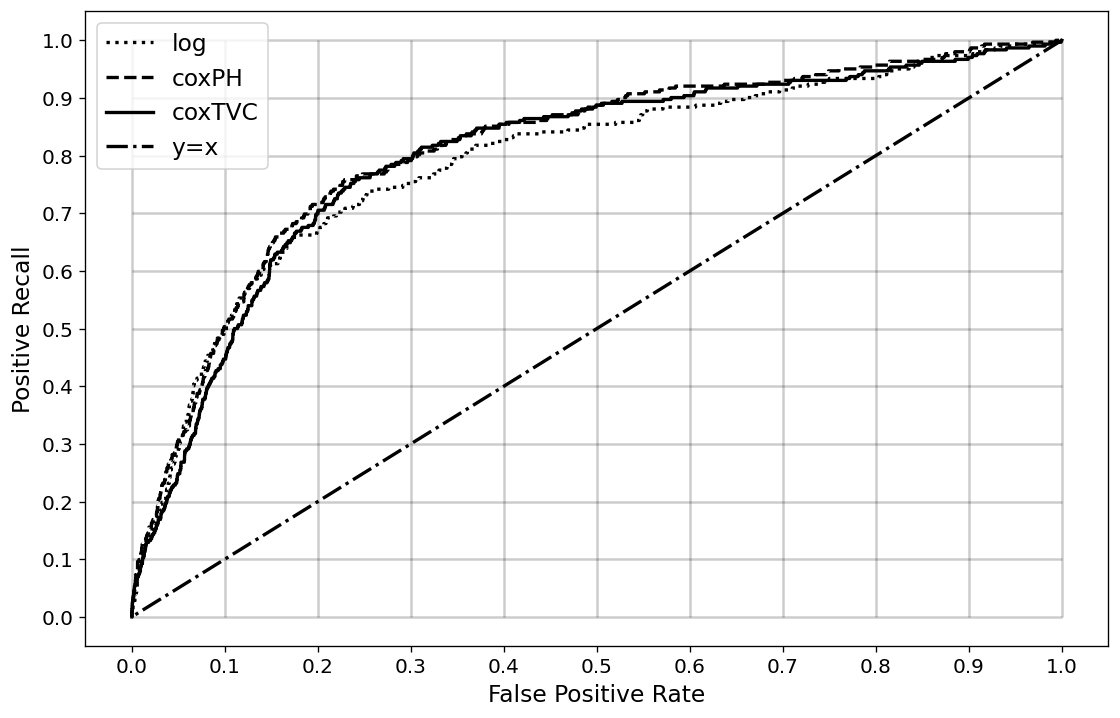

In [10]:
linewidth = 2
color = 'black'
alpha=0.2
#Log
fpr, tpr, _ = roc_curve(y_true=log_predictions[event_col].astype('bool'), y_score=log_predictions['prediction'])
plt.plot(fpr, tpr, color='black', label='log', linestyle='dotted', linewidth=linewidth)
#CoxPH
fpr, tpr, _ = roc_curve(y_true=coxPH_predictions[event_col].astype('bool'), y_score=coxPH_predictions['prediction'])
plt.plot(fpr, tpr, color='black', label='coxPH', linestyle='dashed', linewidth=linewidth)
#CoxTVC
fpr, tpr, _ = roc_curve(y_true=coxTVC_predictions[event_col].astype('bool'), y_score=coxTVC_predictions['prediction'])
plt.plot(fpr, tpr, color='black', label='coxTVC', linestyle='solid', linewidth=linewidth)
# Refernce line
plt.plot([1,0], [1,0], color='black', label='y=x', linestyle='dashdot', linewidth=linewidth)

ticks = np.arange(0,1.1,0.1)
plt.hlines(y=ticks, xmin=0, xmax=1, colors=color, alpha=alpha)
plt.vlines(x=ticks, ymin=0, ymax=1, colors=color, alpha=alpha)
plt.xlabel('False Positive Rate', fontsize=fontsize)
plt.xticks(ticks, fontsize=fontsize-2)
plt.ylabel('Positive Recall', fontsize=fontsize)
plt.yticks(ticks, fontsize=fontsize-2)
plt.legend(fontsize=fontsize)
plt.savefig(fname=image_dest+'ROC_TVC.png', bbox_inches='tight')
plt.show()

# Highest Risk In Time

In [2]:
filename = 'coxTVC_predictions0.pickle'
infile = open(folder+filename,'rb')
coxTVC_predictions = pickle.load(infile)
infile.close()
print(coxTVC_predictions.head())

filename = 'cox_time_ready.pickle'
infile = open(folder+filename,'rb')
coxTVC_data = pickle.load(infile)
infile.close()
coxTVC_data.head()

  SPA_PER_ID  prediction  CMIS_MATCH
0          6    0.388284       False
1          6    0.448212       False
2          6    0.394121       False
3         12    0.261054       False
4         14    0.775119       False


,PAST_DUE,TOTAL_60_DAYS_AMT,NUM_PREM_FOR_PER,BREAK_ARRANGEMENT,COVID_REMINDER,MULTI_DWELL_SIZE,SNAP_GEO,NUM_PER_FOR_PREM,HAS_COTENANT,SPA_PER_ID,CMIS_MATCH,start,stop
0,0,0.00,1,0,0,0,0.167376,2,True,1,False,59,60
2,0,0.00,1,0,0,0,0.000000,1,False,3,False,0,60
14,0,119.05,1,0,0,0,0.000000,1,False,3,False,12,13
27,0,4.42,1,0,0,0,0.000000,1,False,3,False,25,26
63,0,0.00,1,0,0,0,0.259762,2,True,4,False,25,60


In [3]:
print(len(coxTVC_predictions))
len(coxTVC_data)

632511


632511

In [4]:
coxTVC_time = coxTVC_data[['SPA_PER_ID', 'start', 'stop']].join(coxTVC_predictions.set_index('SPA_PER_ID'), how='left', on='SPA_PER_ID')
coxTVC_time.head()

,SPA_PER_ID,start,stop,prediction,CMIS_MATCH
0,1,59,60,0.327853,False
2,3,0,60,0.424987,False
2,3,0,60,0.501642,False
2,3,0,60,0.427612,False
14,3,12,13,0.424987,False


In [16]:
coxTVC_time0 = coxTVC_time[coxTVC_time.CMIS_MATCH].groupby(['SPA_PER_ID', 'start', 'stop'])['prediction'].max()
coxTVC_time0.head()

SPA_PER_ID  start  stop
151         0      8       71.255023
            1      2       71.255023
            2      3       71.255023
            3      4       71.255023
            4      5       71.255023
Name: prediction, dtype: float64

array([ True])